In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
# read CSV file, parse 'date' column into DateTime, set 'date' as the df index
#df = pd.read_csv("https://covid.ourworldindata.org/data/who/full_data.csv", parse_dates=['date'], index_col="date")
df = pd.read_csv("data/coronavirus/full_data_2020-03-23.csv", parse_dates=['date'], index_col="date")
#note that the date column label is listed lower than the other column labels, indicating it is the index value
df.head(5)

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0


In [122]:
df.columns

Index(['location', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths'], dtype='object')

Text(0.5, 0, 'Date')

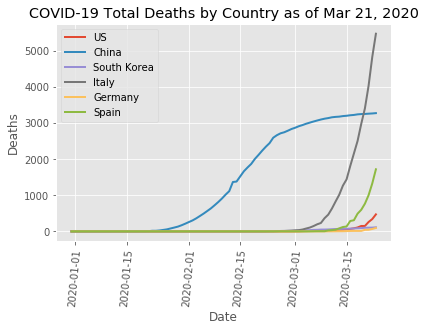

In [41]:
plt.style.use('ggplot')
dfloc = df.groupby('location')
plt.plot(dfloc.get_group('United States')['total_deaths'], label='US', linewidth=2)
plt.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=2)
plt.plot(dfloc.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=2)
plt.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=2)
plt.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=2)
plt.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=2)
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Deaths by Country as of Mar 21, 2020')
plt.ylabel('Deaths')
plt.xlabel('Date')
#plt.show()
#plt.savefig('COVID-2020-03-21d.png', bbox_inches='tight', pad_inches=0.2)

Text(0.5, 0, 'Date')

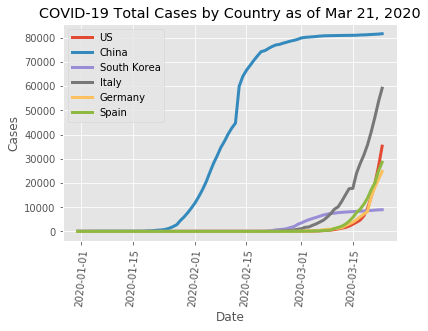

In [45]:
plt.style.use('ggplot')
plt.plot(figsize=(20,20))
plt.plot(dfloc.get_group('United States')['total_cases'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South Korea')['total_cases'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Cases by Country as of Mar 21, 2020')
plt.ylabel('Cases')
plt.xlabel('Date')

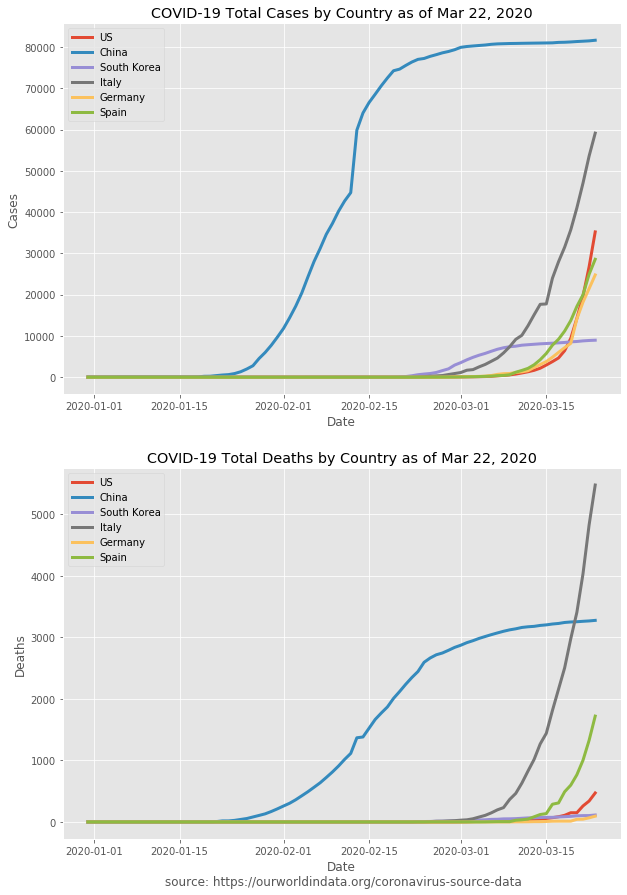

In [44]:
# Double figure for World Cases and World Deaths
plt.style.use('ggplot')
fig3, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United States')['total_cases'], label='US', linewidth=3)
ax1.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
ax1.plot(dfloc.get_group('South Korea')['total_cases'], label='South Korea', linewidth=3)
ax1.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
ax1.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
ax1.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
#ax1.xticks(rotation='85')
ax1.legend(loc='best')
ax1.set_title('COVID-19 Total Cases by Country as of Mar 22, 2020')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United States')['total_deaths'], label='US', linewidth=3)
ax2.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
ax2.plot(dfloc.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
ax2.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
ax2.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
ax2.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
#ax2.xticks(rotation='85')
ax2.legend(loc='best')
ax2.set_title('COVID-19 Total Deaths by Country as of Mar 22, 2020')
ax2.set_ylabel('Deaths')
ax2.set_xlabel('Date\n source: https://ourworldindata.org/coronavirus-source-data')
#ax2.text(1, 1, 'source: https://ourworldindata.org/coronavirus-source-data')
#plt.figtext(5, 0.5, 10, text='test')
#plt.show()
plt.savefig('COVID-2020-03-23.png', bbox_inches='tight', pad_inches=0.2)

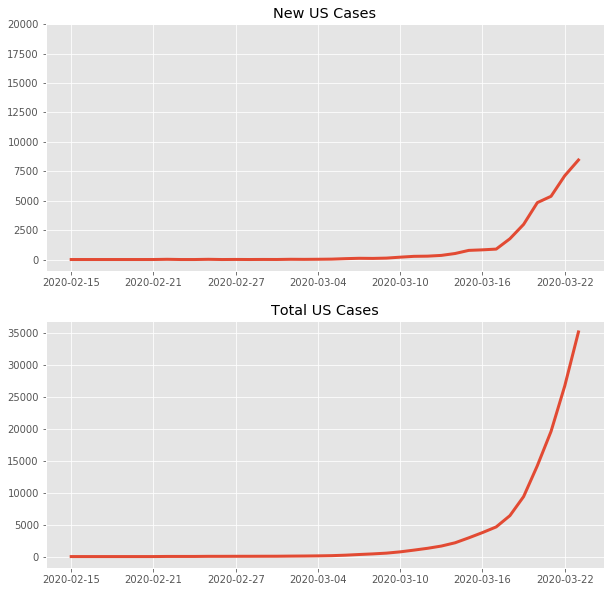

In [46]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

#plot 'new_cases' from United States from Feb 15 - Current Date 
ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United States')["2020-02-15":].new_cases, linewidth=3)
ax1.set_ylim((-1000,20000))
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.set_title('New US Cases')

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United States')["2020-02-15":].total_cases, linewidth=3)
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.set_title('Total US Cases')

plt.show()

In [197]:
# return multiple columsn for row with the maximum number of new deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['new_deaths'] == df_us['new_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-21,United States,5374,19624,110,260


In [198]:
# return location and new cases for row with the maximum number of total deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['total_deaths'] == df_us['total_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-22,United States,7123,26747,80,340


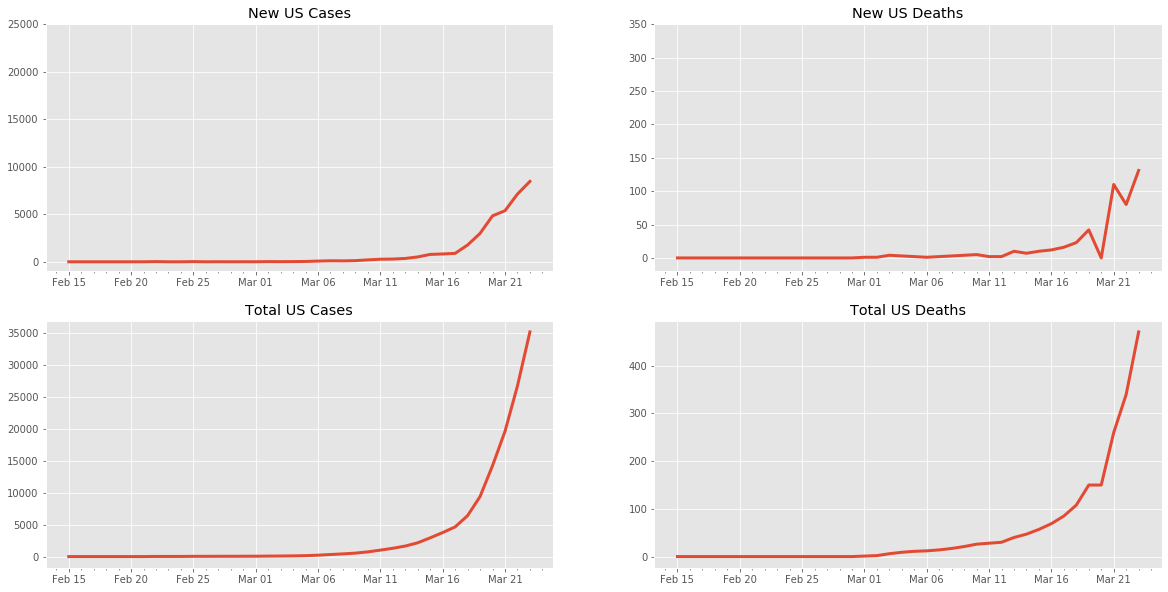

In [47]:
plt.style.use('ggplot')
#plt.xkcd()

#create a figure with two rows and two columns of graphs
fig, (axes) = plt.subplots(2, 2, figsize=(20,10))

#new graph in position 1 of 4 in 2x2 figure
ax1 = plt.subplot(221)
#plot 'new_cases' from location grouped dataframe
ax1.plot(dfloc.get_group('United States')["2020-02-15":].new_cases, linewidth=3)
#set y-limit to match scale of total cases
ax1.set_ylim((-1000,25000))
#set ticks every week
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set major ticks at seven spots
#ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# set minor ticks at days
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.set_title('New US Cases')

ax2 = plt.subplot(223)
ax2.plot(dfloc.get_group('United States')["2020-02-15":].total_cases, linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
ax2.set_title('Total US Cases')

ax3 = plt.subplot(222)
#ax3.plot(df_mar_us.new_deaths.resample('D').mean())
ax3.plot(dfloc.get_group('United States')["2020-02-15":].new_deaths, linewidth=3)
ax3.set_ylim((-20,350))
#major ticks once a week
#ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
#major ticks every 4 days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3.xaxis.set_minor_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title('New US Deaths')

ax4 = plt.subplot(224)
ax4.plot(dfloc.get_group('United States')["2020-02-15":].total_deaths, linewidth=3)
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU, WE)))
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax4.xaxis.set_minor_locator(mdates.DayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_title('Total US Deaths')

plt.show()

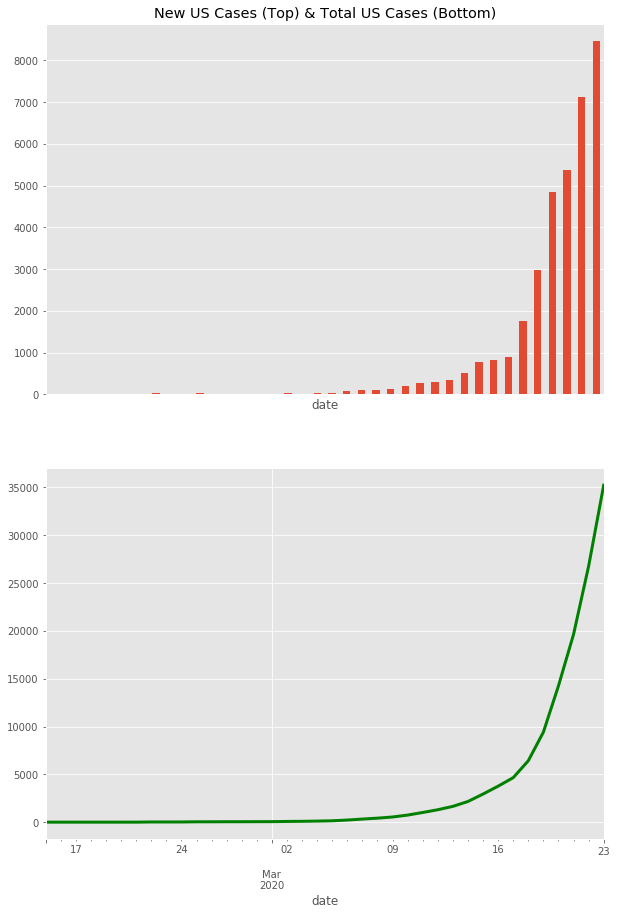

In [48]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

#x_indexes = np.arange(len(dfloc.get_group('United States')["2020-02-15":].total_cases))
#print(x_indexes)

#ax1=dfloc.get_group('United States')["2020-02-15":].new_cases.plot(ax=axes[0], color='orange', kind='bar')
dfloc.get_group('United States')["2020-02-15":].new_cases.plot(kind='bar', ax=ax1)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax1=ax1.set_ylim((-1000,20000))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1=ax1.xaxis.set_minor_locator(mdates.DayLocator())
#ax2=dfloc.get_group('United States')["2020-02-15":].total_cases.plot(ax=axes[1], color='green', kind='line')
dfloc.get_group('United States')["2020-02-15":].total_cases.plot(ax=ax2, color='green', linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#set y-limit to match scale of total cases
#ax1.set_ylim((-1000,20000))

ax1.set_title('New US Cases (Top) & Total US Cases (Bottom)')
#ax2.set_title('Total US Cases')
plt.show()